## Import data

In [1]:
import numpy as np
import pandas as pd
reviews=pd.read_excel('/Users/shen1/Desktop/ReviewsTo1013.xlsx',header=0)

In [2]:
reviews.head()

,content,score,thumbsUpCount,reviewCreatedVersionAdjusted,at,replyContent,repliedAt,sortOrder,Subjectivity,Polarity,AnalysisNew,Analysis,length,usefulness,ABS,Days of comments
0,"I love this game, but lately I have tried to l...",1,2,3.1.0,2022-10-13 21:08:10,"Hello Traveler, thank you for supporting Gensh...",2022-10-13 21:19:58,most_relevant,0.551852,0.056481,Positive,Positive,89,0,2,17
1,Genshin Impact is a very pretty game with a lo...,3,1,3.1.0,2022-10-13 20:38:57,"Thank you for supporting Genshin Impact, Trave...",2022-10-13 21:19:42,most_relevant,0.496759,0.160185,Positive,Positive,90,0,0,17
2,"Another year, another review. This is an amazi...",4,6,3.1.0,2022-10-13 10:07:51,NaN,NaT,most_relevant,0.668182,0.275758,Positive,Positive,88,1,1,17
3,"Beautiful and amazing game, bit laggy occassio...",4,1,3.1.0,2022-10-13 06:35:44,NaN,NaT,most_relevant,0.700000,0.083333,Positive,Positive,65,0,1,17
4,"khm, i wouldn't recommend this game to anyone,...",3,0,3.1.0,2022-10-13 06:31:22,NaN,NaT,most_relevant,0.343750,0.081250,Positive,Positive,93,0,0,17


## Additional stopwords

[('.', 3403), (',', 2643), ('game', 1746), ("'s", 698), ("n't", 574), ('character', 522), ('!', 406), ('play', 390), ('get', 369), ('good', 319), ('like', 314), ('really', 299), ('story', 250), ('time', 240), ('great', 239), ('even', 236), ('playing', 220), ('love', 211), ('ha', 206), ('graphic', 203), ('wa', 202), ('player', 201), ('update', 200), ('fun', 199), (')', 196), ('new', 194), ('(', 189), ('mobile', 187), ('problem', 184), ('phone', 184), ('much', 182), ('amazing', 176), ('still', 174), ('make', 174), ('would', 173), ('one', 158), ("'m", 158), ('lot', 156), ('quest', 154), ('star', 147), ("'ve", 146), ('thing', 146), ('also', 141), ('ca', 141), ('please', 138), ('take', 136), ('genshin', 134), ('want', 132), (':', 127), ('issue', 126)]


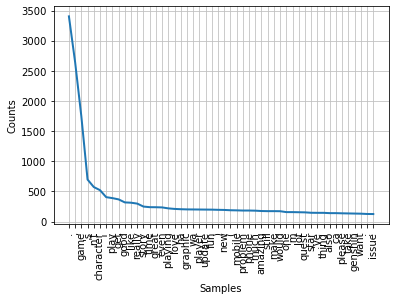

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
import nltk
from nltk.corpus import stopwords
WNlemma = nltk.WordNetLemmatizer()

text = reviews['content']
tokens = [nltk.word_tokenize(t) for t in text] #a list of lists

tokens_aggregate = []
for i in range(len(tokens)):
        tokens_aggregate += tokens[i]

tokens_aggregate =[ WNlemma.lemmatize(t.lower()) for t in tokens_aggregate]       
tokens_aggregate = [ t for t in tokens_aggregate if t not in stopwords.words("english")]

fd = nltk.FreqDist(tokens_aggregate)
print(fd.most_common(50))
fd.plot(50)
## additional stopwords: 'game', ''s', 'n't', 'get', 'also', 'even', 'really', 'like','ca', 'still', 'ha', 'wa', ''m', 'one', ''ve' 

## Pre-processing

In [76]:
import string
import nltk
from nltk.corpus import stopwords
mystopwords=stopwords.words("english") + ['game',  'even', 'really','like', 'still','\'s','n\'t', 'get', 'also', 'ca', 'ha', 'wa', '\'m', 'one', '\'ve' ]
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if t not in string.punctuation ]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    return(tokens)

text = reviews['content']
toks = text.apply(pre_process)

In [5]:
type(toks)

pandas.core.series.Series

## Use dictionary (built from corpus) to prepare a DTM (using frequency)

In [7]:
pip install gensim '3.8.1'
"""
pip install gensim '3.8.1'

ERROR: Could not find a version that satisfies the requirement 3.8.1 (from versions: none)
ERROR: No matching distribution found for 3.8.1
"""

SyntaxError: invalid syntax (2362854786.py, line 1)

In [77]:
import logging
import gensim 
from gensim import corpora

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Filter off any words with document frequency less than 2, or appearing in more than 90% documents
dictionary = corpora.Dictionary(toks)
print(dictionary)

2022-11-02 17:28:56,394 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-11-02 17:28:56,468 : INFO : built Dictionary(4785 unique tokens: ['able', 'account', 'always', 'appears', 'beggining']...) from 1273 documents (total 30940 corpus positions)


Dictionary(4785 unique tokens: ['able', 'account', 'always', 'appears', 'beggining']...)


In [78]:
dictionary.filter_extremes(no_below=2, no_above=0.9)
"""
        no_below : int, optional
            Keep tokens which are contained in at least `no_below` documents.
        no_above : float, optional
            Keep tokens which are contained in no more than `no_above` documents
            (fraction of total corpus size, not an absolute number).
"""
print(dictionary)

2022-11-02 17:28:59,503 : INFO : discarding 2697 tokens: [('conection', 1), ('wich', 1), ('dozen', 1), ('frustruating', 1), ('funnel', 1), ('mechanical', 1), ('roadblock', 1), ('neglect', 1), ('worthy', 1), ('dying', 1)]...
2022-11-02 17:28:59,505 : INFO : keeping 2088 tokens which were in no less than 2 and no more than 1145 (=90.0%) documents
2022-11-02 17:28:59,511 : INFO : resulting dictionary: Dictionary(2088 unique tokens: ['able', 'account', 'always', 'appears', 'beggining']...)


Dictionary(2088 unique tokens: ['able', 'account', 'always', 'appears', 'beggining']...)


In [79]:
## dtm here is a list of lists, which is exactly a matrix
dtm = [dictionary.doc2bow(d) for d in toks]

In [80]:
print(dtm)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(9, 1), (27, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1)], [(16, 1), (34, 1), (44, 1), (46, 1), (61, 2), (62, 4), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 3), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(16, 1), (25, 1), (34, 1), (62, 1), (65, 1), (85, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99,

## LDA

In [120]:
lda = gensim.models.ldamodel.LdaModel(dtm, num_topics = 4, id2word = dictionary, passes=10,chunksize=128,random_state=10)
lda.show_topics(10)

2022-11-02 18:09:27,771 : INFO : using symmetric alpha at 0.25
2022-11-02 18:09:27,772 : INFO : using symmetric eta at 0.25
2022-11-02 18:09:27,774 : INFO : using serial LDA version on this node
2022-11-02 18:09:27,777 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 1273 documents, updating model once every 128 documents, evaluating perplexity every 1273 documents, iterating 50x with a convergence threshold of 0.001000
2022-11-02 18:09:27,778 : INFO : PROGRESS: pass 0, at document #128/1273
2022-11-02 18:09:28,199 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:28,202 : INFO : topic #0 (0.250): 0.018*"character" + 0.016*"great" + 0.013*"story" + 0.012*"love" + 0.011*"graphic" + 0.011*"playing" + 0.010*"amazing" + 0.010*"content" + 0.009*"want" + 0.008*"gameplay"
2022-11-02 18:09:28,203 : INFO : topic #1 (0.250): 0.015*"character" + 0.015*"play" + 0.012*"much" + 0.009*"lot" + 0.009*"great" + 0

2022-11-02 18:09:29,774 : INFO : topic #0 (0.250): 0.028*"phone" + 0.019*"play" + 0.016*"controller" + 0.016*"storage" + 0.015*"great" + 0.014*"please" + 0.013*"support" + 0.013*"account" + 0.012*"mobile" + 0.011*"android"
2022-11-02 18:09:29,775 : INFO : topic #1 (0.250): 0.017*"would" + 0.014*"play" + 0.012*"character" + 0.012*"hour" + 0.011*"thing" + 0.011*"quest" + 0.011*"help" + 0.010*"boring" + 0.009*"world" + 0.009*"every"
2022-11-02 18:09:29,776 : INFO : topic #2 (0.250): 0.023*"character" + 0.015*"time" + 0.012*"player" + 0.011*"new" + 0.009*"play" + 0.009*"make" + 0.009*"would" + 0.008*"good" + 0.008*"quest" + 0.008*"amazing"
2022-11-02 18:09:29,776 : INFO : topic #3 (0.250): 0.023*"good" + 0.017*"play" + 0.016*"update" + 0.015*"character" + 0.014*"fun" + 0.013*"star" + 0.012*"playing" + 0.012*"story" + 0.011*"new" + 0.010*"fix"
2022-11-02 18:09:29,778 : INFO : topic diff=0.651078, rho=0.353553
2022-11-02 18:09:29,778 : INFO : PROGRESS: pass 0, at document #1152/1273
2022-11-

2022-11-02 18:09:31,393 : INFO : topic #2 (0.250): 0.027*"character" + 0.012*"player" + 0.011*"new" + 0.010*"make" + 0.009*"story" + 0.009*"time" + 0.009*"want" + 0.009*"good" + 0.009*"great" + 0.008*"quest"
2022-11-02 18:09:31,394 : INFO : topic #3 (0.250): 0.028*"good" + 0.018*"update" + 0.016*"play" + 0.016*"character" + 0.015*"star" + 0.014*"fun" + 0.013*"story" + 0.012*"graphic" + 0.012*"new" + 0.010*"playing"
2022-11-02 18:09:31,395 : INFO : topic diff=0.306457, rho=0.289335
2022-11-02 18:09:31,396 : INFO : PROGRESS: pass 1, at document #768/1273
2022-11-02 18:09:31,544 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:31,546 : INFO : topic #0 (0.250): 0.025*"phone" + 0.022*"play" + 0.018*"please" + 0.018*"storage" + 0.017*"great" + 0.016*"controller" + 0.014*"update" + 0.013*"support" + 0.013*"space" + 0.012*"mobile"
2022-11-02 18:09:31,547 : INFO : topic #1 (0.250): 0.018*"would" + 0.014*"boring" + 0.013*"character" + 0.011*"play" + 0.0

2022-11-02 18:09:32,976 : INFO : topic diff=0.163840, rho=0.277935
2022-11-02 18:09:32,977 : INFO : PROGRESS: pass 2, at document #384/1273
2022-11-02 18:09:33,094 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:33,096 : INFO : topic #0 (0.250): 0.023*"phone" + 0.022*"play" + 0.015*"please" + 0.015*"mobile" + 0.015*"great" + 0.013*"account" + 0.013*"support" + 0.012*"problem" + 0.012*"controller" + 0.012*"space"
2022-11-02 18:09:33,097 : INFO : topic #1 (0.250): 0.014*"character" + 0.013*"would" + 0.011*"thing" + 0.009*"play" + 0.009*"world" + 0.009*"quest" + 0.009*"ever" + 0.008*"boring" + 0.008*"every" + 0.008*"best"
2022-11-02 18:09:33,098 : INFO : topic #2 (0.250): 0.029*"character" + 0.012*"story" + 0.011*"player" + 0.011*"great" + 0.011*"content" + 0.010*"time" + 0.010*"new" + 0.010*"good" + 0.009*"want" + 0.008*"system"
2022-11-02 18:09:33,099 : INFO : topic #3 (0.250): 0.025*"good" + 0.016*"character" + 0.016*"play" + 0.015*"update" +

2022-11-02 18:09:34,510 : INFO : topic #1 (0.250): 0.019*"would" + 0.016*"character" + 0.013*"thing" + 0.009*"look" + 0.009*"quest" + 0.009*"fighting" + 0.008*"boring" + 0.008*"know" + 0.008*"ever" + 0.008*"fun"
2022-11-02 18:09:34,511 : INFO : topic #2 (0.250): 0.031*"character" + 0.013*"great" + 0.013*"story" + 0.012*"time" + 0.010*"player" + 0.010*"make" + 0.010*"amazing" + 0.009*"good" + 0.009*"quest" + 0.009*"new"
2022-11-02 18:09:34,512 : INFO : topic #3 (0.250): 0.023*"good" + 0.016*"character" + 0.016*"update" + 0.016*"graphic" + 0.016*"fun" + 0.014*"playing" + 0.013*"play" + 0.013*"star" + 0.011*"new" + 0.011*"story"
2022-11-02 18:09:34,512 : INFO : topic diff=0.332533, rho=0.277935
2022-11-02 18:09:34,514 : INFO : PROGRESS: pass 3, at document #128/1273
2022-11-02 18:09:34,669 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:34,671 : INFO : topic #0 (0.250): 0.027*"phone" + 0.022*"play" + 0.021*"mobile" + 0.016*"problem" + 0.014*"sto

2022-11-02 18:09:35,504 : INFO : topic diff=0.315667, rho=0.267785
2022-11-02 18:09:35,505 : INFO : PROGRESS: pass 3, at document #1024/1273
2022-11-02 18:09:35,660 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:35,662 : INFO : topic #0 (0.250): 0.028*"phone" + 0.024*"play" + 0.018*"mobile" + 0.015*"please" + 0.015*"storage" + 0.015*"controller" + 0.013*"fix" + 0.013*"problem" + 0.013*"support" + 0.013*"account"
2022-11-02 18:09:35,663 : INFO : topic #1 (0.250): 0.021*"would" + 0.013*"character" + 0.011*"thing" + 0.011*"boring" + 0.010*"look" + 0.010*"quest" + 0.009*"hour" + 0.009*"know" + 0.008*"minute" + 0.008*"..."
2022-11-02 18:09:35,664 : INFO : topic #2 (0.250): 0.026*"character" + 0.013*"time" + 0.012*"player" + 0.011*"story" + 0.011*"great" + 0.010*"good" + 0.010*"new" + 0.010*"play" + 0.009*"quest" + 0.009*"amazing"
2022-11-02 18:09:35,665 : INFO : topic #3 (0.250): 0.024*"good" + 0.017*"update" + 0.015*"playing" + 0.015*"play" + 0.

2022-11-02 18:09:36,960 : INFO : topic #1 (0.250): 0.021*"would" + 0.016*"character" + 0.012*"boring" + 0.010*"thing" + 0.010*"best" + 0.009*"quest" + 0.009*"ever" + 0.009*"dialogue" + 0.009*"..." + 0.008*"skip"
2022-11-02 18:09:36,961 : INFO : topic #2 (0.250): 0.029*"character" + 0.013*"player" + 0.012*"story" + 0.012*"great" + 0.011*"good" + 0.011*"new" + 0.009*"content" + 0.009*"quest" + 0.009*"play" + 0.009*"time"
2022-11-02 18:09:36,962 : INFO : topic #3 (0.250): 0.026*"good" + 0.019*"update" + 0.016*"play" + 0.014*"character" + 0.014*"graphic" + 0.014*"star" + 0.013*"new" + 0.013*"fun" + 0.013*"playing" + 0.009*"story"
2022-11-02 18:09:36,963 : INFO : topic diff=0.193481, rho=0.258671
2022-11-02 18:09:36,964 : INFO : PROGRESS: pass 4, at document #768/1273
2022-11-02 18:09:37,091 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:37,094 : INFO : topic #0 (0.250): 0.025*"phone" + 0.025*"play" + 0.020*"please" + 0.018*"storage" + 0.017*"mob

2022-11-02 18:09:38,309 : INFO : topic #3 (0.250): 0.025*"good" + 0.016*"update" + 0.015*"character" + 0.015*"graphic" + 0.015*"play" + 0.014*"playing" + 0.013*"star" + 0.012*"fun" + 0.011*"new" + 0.010*"lot"
2022-11-02 18:09:38,310 : INFO : topic diff=0.140818, rho=0.250428
2022-11-02 18:09:38,312 : INFO : PROGRESS: pass 5, at document #384/1273
2022-11-02 18:09:38,444 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:38,446 : INFO : topic #0 (0.250): 0.023*"phone" + 0.023*"play" + 0.019*"mobile" + 0.016*"please" + 0.014*"problem" + 0.013*"account" + 0.013*"support" + 0.012*"controller" + 0.012*"space" + 0.012*"storage"
2022-11-02 18:09:38,447 : INFO : topic #1 (0.250): 0.017*"would" + 0.014*"character" + 0.011*"thing" + 0.011*"best" + 0.010*"ever" + 0.009*"dialogue" + 0.009*"awesome" + 0.008*"boring" + 0.008*"look" + 0.008*"world"
2022-11-02 18:09:38,448 : INFO : topic #2 (0.250): 0.030*"character" + 0.013*"story" + 0.013*"great" + 0.012*"pla

2022-11-02 18:09:39,847 : INFO : topic #0 (0.250): 0.031*"phone" + 0.023*"play" + 0.022*"mobile" + 0.017*"problem" + 0.015*"storage" + 0.014*"controller" + 0.013*"space" + 0.012*"fix" + 0.012*"support" + 0.012*"please"
2022-11-02 18:09:39,848 : INFO : topic #1 (0.250): 0.023*"would" + 0.016*"character" + 0.014*"thing" + 0.010*"look" + 0.010*"best" + 0.009*"fighting" + 0.009*"ever" + 0.008*"amazing" + 0.008*"everything" + 0.008*"boring"
2022-11-02 18:09:39,849 : INFO : topic #2 (0.250): 0.031*"character" + 0.014*"great" + 0.014*"story" + 0.012*"time" + 0.011*"player" + 0.010*"good" + 0.009*"quest" + 0.009*"fun" + 0.009*"play" + 0.009*"make"
2022-11-02 18:09:39,850 : INFO : topic #3 (0.250): 0.022*"good" + 0.017*"update" + 0.016*"graphic" + 0.015*"character" + 0.014*"playing" + 0.014*"fun" + 0.013*"play" + 0.012*"new" + 0.011*"star" + 0.010*"lot"
2022-11-02 18:09:39,851 : INFO : topic diff=0.266614, rho=0.250428
2022-11-02 18:09:39,852 : INFO : PROGRESS: pass 6, at document #128/1273
202

2022-11-02 18:09:40,760 : INFO : topic #3 (0.250): 0.025*"good" + 0.018*"update" + 0.017*"play" + 0.015*"playing" + 0.014*"character" + 0.014*"graphic" + 0.012*"new" + 0.012*"fun" + 0.011*"star" + 0.010*"lot"
2022-11-02 18:09:40,761 : INFO : topic diff=0.256580, rho=0.242927
2022-11-02 18:09:40,762 : INFO : PROGRESS: pass 6, at document #1024/1273
2022-11-02 18:09:40,910 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:40,912 : INFO : topic #0 (0.250): 0.028*"phone" + 0.024*"play" + 0.020*"mobile" + 0.016*"please" + 0.015*"storage" + 0.015*"controller" + 0.014*"problem" + 0.013*"fix" + 0.013*"support" + 0.013*"account"
2022-11-02 18:09:40,913 : INFO : topic #1 (0.250): 0.023*"would" + 0.013*"character" + 0.012*"thing" + 0.010*"boring" + 0.010*"look" + 0.010*"best" + 0.009*"ever" + 0.009*"minute" + 0.009*"quest" + 0.009*"..."
2022-11-02 18:09:40,914 : INFO : topic #2 (0.250): 0.027*"character" + 0.013*"time" + 0.012*"player" + 0.012*"story" + 0

2022-11-02 18:09:42,132 : INFO : topic #0 (0.250): 0.024*"phone" + 0.024*"play" + 0.020*"mobile" + 0.019*"please" + 0.015*"controller" + 0.015*"storage" + 0.013*"support" + 0.013*"great" + 0.013*"problem" + 0.012*"account"
2022-11-02 18:09:42,134 : INFO : topic #1 (0.250): 0.023*"would" + 0.016*"character" + 0.011*"best" + 0.011*"boring" + 0.011*"thing" + 0.010*"ever" + 0.010*"love" + 0.009*"dialogue" + 0.009*"skip" + 0.009*"amazing"
2022-11-02 18:09:42,135 : INFO : topic #2 (0.250): 0.029*"character" + 0.013*"story" + 0.013*"player" + 0.012*"great" + 0.012*"good" + 0.011*"new" + 0.010*"content" + 0.010*"quest" + 0.009*"play" + 0.009*"system"
2022-11-02 18:09:42,136 : INFO : topic #3 (0.250): 0.025*"good" + 0.020*"update" + 0.016*"play" + 0.015*"graphic" + 0.014*"character" + 0.013*"new" + 0.013*"playing" + 0.012*"fun" + 0.011*"star" + 0.010*"bug"
2022-11-02 18:09:42,137 : INFO : topic diff=0.159799, rho=0.236061
2022-11-02 18:09:42,138 : INFO : PROGRESS: pass 7, at document #768/1273


2022-11-02 18:09:43,412 : INFO : topic #2 (0.250): 0.030*"character" + 0.014*"story" + 0.013*"great" + 0.012*"player" + 0.012*"content" + 0.011*"good" + 0.011*"time" + 0.010*"system" + 0.009*"new" + 0.009*"play"
2022-11-02 18:09:43,413 : INFO : topic #3 (0.250): 0.024*"good" + 0.017*"update" + 0.015*"graphic" + 0.015*"play" + 0.014*"character" + 0.014*"playing" + 0.012*"fun" + 0.011*"new" + 0.010*"star" + 0.010*"lot"
2022-11-02 18:09:43,414 : INFO : topic diff=0.126306, rho=0.229747
2022-11-02 18:09:43,415 : INFO : PROGRESS: pass 8, at document #384/1273
2022-11-02 18:09:43,524 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:43,526 : INFO : topic #0 (0.250): 0.024*"play" + 0.023*"phone" + 0.020*"mobile" + 0.015*"please" + 0.015*"problem" + 0.013*"account" + 0.012*"support" + 0.012*"controller" + 0.012*"storage" + 0.011*"space"
2022-11-02 18:09:43,527 : INFO : topic #1 (0.250): 0.018*"would" + 0.014*"character" + 0.013*"best" + 0.012*"thing" +

2022-11-02 18:09:44,647 : INFO : PROGRESS: pass 8, at document #1273/1273
2022-11-02 18:09:44,775 : INFO : merging changes from 121 documents into a model of 1273 documents
2022-11-02 18:09:44,777 : INFO : topic #0 (0.250): 0.030*"phone" + 0.024*"play" + 0.022*"mobile" + 0.017*"problem" + 0.014*"storage" + 0.014*"controller" + 0.013*"space" + 0.012*"fix" + 0.012*"please" + 0.012*"support"
2022-11-02 18:09:44,778 : INFO : topic #1 (0.250): 0.024*"would" + 0.015*"character" + 0.014*"thing" + 0.011*"best" + 0.011*"amazing" + 0.010*"look" + 0.009*"ever" + 0.009*"fighting" + 0.009*"love" + 0.009*"everything"
2022-11-02 18:09:44,780 : INFO : topic #2 (0.250): 0.031*"character" + 0.014*"story" + 0.014*"great" + 0.012*"time" + 0.011*"player" + 0.011*"good" + 0.010*"fun" + 0.010*"quest" + 0.010*"play" + 0.009*"make"
2022-11-02 18:09:44,781 : INFO : topic #3 (0.250): 0.022*"good" + 0.018*"update" + 0.016*"graphic" + 0.015*"character" + 0.014*"play" + 0.014*"playing" + 0.013*"fun" + 0.012*"new" +

2022-11-02 18:09:45,680 : INFO : topic #2 (0.250): 0.027*"character" + 0.013*"story" + 0.012*"great" + 0.012*"player" + 0.012*"good" + 0.012*"time" + 0.010*"play" + 0.010*"reward" + 0.010*"quest" + 0.008*"fun"
2022-11-02 18:09:45,680 : INFO : topic #3 (0.250): 0.025*"good" + 0.018*"update" + 0.017*"play" + 0.015*"playing" + 0.014*"character" + 0.014*"graphic" + 0.012*"new" + 0.011*"fun" + 0.009*"lot" + 0.009*"sumeru"
2022-11-02 18:09:45,681 : INFO : topic diff=0.225036, rho=0.223913
2022-11-02 18:09:45,682 : INFO : PROGRESS: pass 9, at document #1024/1273
2022-11-02 18:09:45,826 : INFO : merging changes from 128 documents into a model of 1273 documents
2022-11-02 18:09:45,828 : INFO : topic #0 (0.250): 0.028*"phone" + 0.024*"play" + 0.020*"mobile" + 0.016*"please" + 0.015*"storage" + 0.014*"controller" + 0.014*"problem" + 0.013*"fix" + 0.013*"support" + 0.012*"account"
2022-11-02 18:09:45,829 : INFO : topic #1 (0.250): 0.024*"would" + 0.013*"character" + 0.012*"thing" + 0.011*"best" + 

[(0,
  '0.030*"phone" + 0.024*"play" + 0.023*"mobile" + 0.017*"problem" + 0.014*"storage" + 0.014*"controller" + 0.013*"space" + 0.012*"fix" + 0.012*"please" + 0.012*"support"'),
 (1,
  '0.024*"would" + 0.015*"character" + 0.014*"thing" + 0.011*"best" + 0.011*"amazing" + 0.010*"look" + 0.010*"ever" + 0.009*"love" + 0.009*"fighting" + 0.009*"everything"'),
 (2,
  '0.031*"character" + 0.014*"story" + 0.014*"great" + 0.012*"time" + 0.011*"player" + 0.011*"good" + 0.010*"fun" + 0.010*"play" + 0.010*"quest" + 0.009*"make"'),
 (3,
  '0.022*"good" + 0.018*"update" + 0.016*"graphic" + 0.014*"character" + 0.014*"play" + 0.014*"playing" + 0.013*"fun" + 0.012*"new" + 0.010*"lot" + 0.009*"sumeru"')]

In [ ]:
help(gensim.models.ldamodel.LdaModel)

In [121]:
# Evaluate the coherence score of LDA models
'''
u_mass:prefer the model close to 0 
c_v: [0,1], prefer bigger value   
Do not fully rely on the coherence score
'''
from gensim.models.coherencemodel import CoherenceModel
cm_umass = CoherenceModel(lda,  dictionary=dictionary, corpus=dtm, coherence='u_mass')
cm_cv = CoherenceModel(lda,  dictionary=dictionary, texts=toks, coherence='c_v')
lda_umass = cm_umass.get_coherence()
lda_cv = cm_cv.get_coherence()
print(lda_umass)
print(lda_cv)

2022-11-02 18:56:16,576 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-11-02 18:56:16,592 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-11-02 18:56:21,456 : INFO : 7 accumulators retrieved from output queue
2022-11-02 18:56:21,477 : INFO : accumulated word occurrence stats for 1125 virtual documents


-2.563966860139107
0.4093804765372313


In [83]:
pip install pyLDAvis==2.1.2

  Using cached pyLDAvis-2.1.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [17]:
print(gensim.__version__)
print(pyLDAvis.__version__)

3.8.1
2.1.2


In [118]:
# Visualize the topics
import pyLDAvis.gensim
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, dtm, dictionary)
pyLDAvis.show(LDAvis_prepared)

#dict = {0: 'war', 1: 'life', 2: 'politic', 3: 'school', 4:'love'}

/Users/shen1/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/Users/shen1/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen1/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen1/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen1/opt/a


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [02/Nov/2022 18:07:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2022 18:07:11] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2022 18:07:11] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2022 18:07:11] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


In [122]:
# Get the topic distribution of each document
doc_topics = lda.get_document_topics(dtm)

In [123]:
# show the topic distributions for the first 5 docs, 
from operator import itemgetter

for i in range(0, 5):
    print(doc_topics[i])
    print(max(doc_topics[i], key=itemgetter(1))[0]) 

[(0, 0.7168371), (1, 0.055387698), (3, 0.21932374)]
0
[(0, 0.11312298), (1, 0.052231364), (2, 0.5546315), (3, 0.28001416)]
2
[(2, 0.825886), (3, 0.16133477)]
2
[(2, 0.29399902), (3, 0.68876916)]
3
[(2, 0.70990324), (3, 0.27584916)]
2


In [124]:
# Select the best topic (with highest score) for each document
top_topic = [ max(t, key=itemgetter(1))[0] for t in doc_topics ]
print (top_topic)


topics_perDoc = [ dict[t] for t in top_topic ]
print (topics_perDoc)

[0, 2, 2, 3, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 3, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 3, 2, 1, 2, 1, 0, 3, 3, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 1, 0, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 3, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 1, 1, 2, 2, 1, 0, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 3, 1, 2, 1, 2, 0, 0, 0, 2, 3, 3, 2, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 3, 0, 1, 2, 3, 0, 1, 0, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 2, 2, 3, 2, 1, 0, 1, 2, 1, 3, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 3, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 3, 0, 0, 3, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 3, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 

In [126]:
type(topics_perDoc)

list

In [129]:
len(topics_perDoc)

1273